In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle

In [250]:
mu.update('wordbank', silent = True)
mu.update('collocations', silent = True)
import collocations as co
import wordbank as wb

In [2]:
css()

In [139]:
code_toggle()

In [130]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w, forms):
    fs = [x.split()[0] for x in forms[w]]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def wforms(words):
    forms = wb.word_form_many(words)
    return {w:[x[1] for x in forms if x[0] == w] for w in words}

def sort_word_forms(words):
    forms = wb.word_form_many(words)
    forms = {w:[x[1] for x in forms if x[0] == w] for w in words}
    res = {select_form(w, forms):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    word_forms = wforms(categories['other'])
    forms = {w:select_form(w, word_forms) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(categories['propr']))
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return Grouping

In [125]:
sort_word_forms(['han','sover', 'alltid'])

{'pron': 'han', 'verb': 'sover', 'adv': 'alltid'}

In [118]:
wb.word_form_many(['han','sover'])

[['han', 'pron pers 3 ent mask hum akk normert'],
 ['han', 'pron pers 3 ent mask hum nom normert'],
 ['sover',
  'verb pres <intrans2> <part4/hen> <part4/inn> <part4/over> <part4/ut> <part1/bort> <trans1> normert']]

In [123]:
nb.word_form('han')

['pron pers 3 ent mask hum akk normert',
 'pron pers 3 ent mask hum nom normert']

In [4]:
update('collocations')

Updated file `D:\Documents\GitHub\Miscellaneous-Notebooks\Foredrag\Litterær telling\collocations.py`

In [5]:
from collocations import make_collocations, collocation, colls2df, urn_coll

In [6]:
import pandas as pd

In [7]:
import ast

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
show = lambda res, col, axis=1: res.sort_values(by=col, ascending=False).head(20).fillna(0).style.background_gradient(axis=axis)

In [12]:
demokrati = nb.make_graph('demokrati', cutoff=16)

# DH-lab

https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/DHLAB_ved_Nasjonalbiblioteket.ipynb

In [113]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

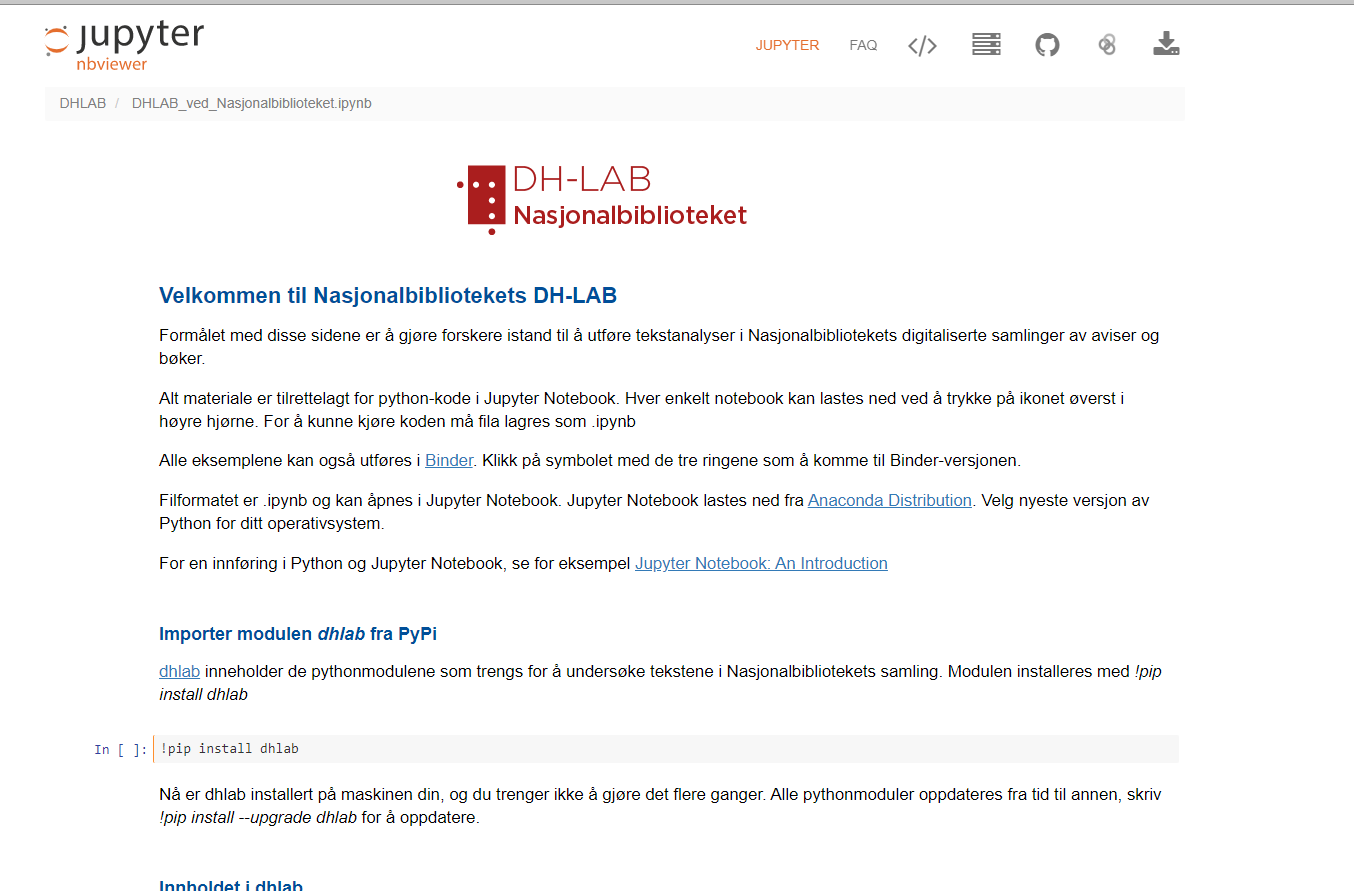

<br/>
<br/>
<br/>

# Hvorfor telle?


Det hjertet er fullt av, renner tastaturet over med.




Vi resonnerer bakover - fra ordtellingen til den ytre verden, den utenfor teksten, det hjertet er fullt av.





# Distribusjonell semantikk

Ordene er koblet til den umiddelbare konteksten.

`Ordets betydning = ordets diskurs`

In [27]:
korpus = nb.book_urn(author = 'Undset%sig%', limit = 200, lang = 'nob')

In [28]:
k_df = nb.frame(nb.unique_urns(korpus),"urn forf tittel år".split())

In [35]:
k_df.drop([61, 62], inplace = True)

In [38]:
print([x for x in k_df.tittel])

['Tilbake til fremtiden', 'kvinnesynspunkt', 'Ungdom', 'Hellig Olav', 'Jenny', 'Fru Marta Oulie', 'Katholsk propaganda', 'Selvbiografiske skrifter', 'Romaner og fortellinger fra nutiden', 'Olav Audunssøn og hans børn', 'Middelalder-verker', 'Olav Audunssøn og hans barn', 'Gunvald og Emma', 'Våren', 'Essays og artikler 1920-1929', 'Fru Marta Oulie ; Splinten av trollspeilet', 'Gymnadenia ; Den brennende busk', 'Gymnadenia', 'Fattige skjæbner', 'Samlede romaner og fortællinger fra nutiden', 'grålysningen', 'Steen Steensen Blicher', 'Sitater', 'Splinten av trollspeilet', 'Madame Dorthea', 'Prinsessene i Berget det blå', 'Vaaren', 'Lykkelige dager', 'ner og fortellinger fra nutiden', 'Fortællingen om Viga-Ljot og Vigdis', 'Sigurd og hans tapre venner', 'brændende busk', 'Kjære Dea', 'Elleve år ; Tolv år', 'Etapper', 'kvinde-synspunkt', 'Artikler og essays om litteratur', 'Essays og artikler 1930-1939', 'Caterina av Siena', 'Sankt Halvards liv, død og jærtegn', 'Fortellinger om Kong Artur o

In [193]:
nb.urn_concordance(word='han', urns = list(k_df[k_df.tittel.str.contains('Lavran')].urn), size=50)

"Kristin Lavransdatter, Undset, Sigrid, 2009",gården Skog . Men da,han,hadde vært her i landet
"Kristin Lavransdatter, Undset, Sigrid, 2009","i åtte år , døde",han,"av sott , og enken"
"Kristin Lavransdatter, Undset, Sigrid, 2009",i en ung alder ;,han,var bare åtteogtyve år ved
"Kristin Lavransdatter, Undset, Sigrid, 2009",åtteogtyve år ved den tid,han,"kom til Sil , og"
"Kristin Lavransdatter, Undset, Sigrid, 2009",hustru . Som fremvokstring hadde,han,vært ved hirden og hadde
"Kristin Lavransdatter, Undset, Sigrid, 2009",men efter sitt giftermål ble,han,boende i ro på sin
"Kristin Lavransdatter, Undset, Sigrid, 2009",de viste sin sogneprest -,han,var deres nærmeste nabo og
"Kristin Lavransdatter, Undset, Sigrid, 2009","mest Lavrans , ti",han,var kjent som en sterk
"Kristin Lavransdatter, Undset, Sigrid, 2009","en stor veidemann, særlig jaget",han,hissig på ulv og bjørn
"Kristin Lavransdatter, Undset, Sigrid, 2009","under sine hender , men",han,var en god og hjelpsom
"Kristin Lavransdatter, Undset, Sigrid, 2009","seg til andre kvinner ,",han,rådførte seg meget med henne


In [194]:
korpus_agg = nb.frame_sort(nb.frame(nb.aggregate_urns(list(k_df.urn))))

In [195]:
korpus_agg

,0
",",261226
.,215915
og,178657
det,104938
i,97772
...,...
ndreß,1
ndre,1
ndr6,1
ndoliF,1


In [69]:
tot = nb.frame(nb.totals(150000), 'tot')

In [83]:
lavrans = list(k_df[k_df.tittel.str.contains('Lavran')].urn)

In [97]:
lavrans_agg = nb.frame(nb.aggregate_urns(lavrans))
nb.normalize_corpus_dataframe(lavrans_agg)

True

In [102]:
def littcoll(word, before = 5, after = 5, urns = None, compare = None, freqlim = 5):
    if urns is None:
        return
    colls = nb.urn_coll(word=word, before = before, after = after, urns = urns)
    colls = colls[colls[0] >= freqlim]
    if compare is None:
        pmi = colls
    else:
        pmi = nb.frame_sort(nb.frame(colls[0]/compare))
    nb.normalize_corpus_dataframe(pmi)
    return pmi

In [149]:
hun_lav = littcoll('hun', before = 0, after = 3, urns = lavrans, compare = tot.tot, freqlim = 3)

In [150]:
hun_lav2 = littcoll('hun', before = 0, after = 3, urns = lavrans, compare = lavrans_agg[0], freqlim= 3)

In [151]:
han_lav = littcoll('han', before = 0, after = 3, urns = lavrans, compare = tot.tot, freqlim = 3)

In [152]:
han_lav2 = littcoll('han', before = 0, after = 3, urns = lavrans, compare = lavrans_agg[0], freqlim = 3)

In [290]:
pprint = lambda x, col = 0: mdprint(x.sort_values(by=col, ascending=False).head(100),-1)

In [154]:
hun_lav2

,0
hakket,0.025739
dånet,0.025739
droges,0.020592
gruet,0.020592
forstod,0.017160
...,...
übårne,0.000000
übønnhørlig,0.000000
übøyelig,0.000000
—,0.000000


In [161]:
lavrans_navn = nb.names(lavrans)

In [246]:
lavrans_navn

(Counter({'Adam': 3,
          'Agata': 8,
          'Agnes': 6,
          'Aker': 6,
          'Akersnes': 6,
          'Alf': 8,
          'Allart': 5,
          'Andres': 88,
          'Andresdatter': 9,
          'Andressøn': 77,
          'Angerd': 8,
          'Annet': 4,
          'Aressøn': 3,
          'Arne': 148,
          'Arnes': 12,
          'Arnessøn': 4,
          'Arngjerd': 36,
          'Arngjerds': 6,
          'Arngrim': 10,
          'Arntor': 8,
          'Asgaut': 3,
          'Aslak': 7,
          'Astrid': 16,
          'Audhild': 7,
          'Audun': 19,
          'Audunsdatter': 6,
          'Ave': 9,
          'Bajard': 4,
          'Bakke': 6,
          'Bengta': 3,
          'Bentein': 38,
          'Benteins': 4,
          'Betlem': 5,
          'Birgsi': 9,
          'Biskop': 5,
          'Biskopen': 20,
          'Bjarkøy': 4,
          'Bjarne': 30,
          'Bjarnes': 5,
          'Bjørgulf': 118,
          'Bjørgulf-': 5,
          'Bjørgulfs': 

In [168]:
lavrans_navn_df = nb.frame_sort(nb.frame(lavrans_navn[0]))

In [173]:
tot.tot

.                1265723110
,                1105303412
og                543432056
i                 460246057
det               273411583
                    ...    
waterfall              4925
veiv                   4925
transformerer          4925
traner                 4925
surveying              4925
Name: tot, Length: 150000, dtype: int64

In [179]:
names = nb.frame_sort(nb.frame(lavrans_navn_df.head(100)[0]/tot.loc[lavrans_navn_df.head(100).index].tot)).head(50)

In [178]:
lavrans[0]

2013010305070

In [181]:
G = nb.make_network_graph(lavrans[0], list(names.index))

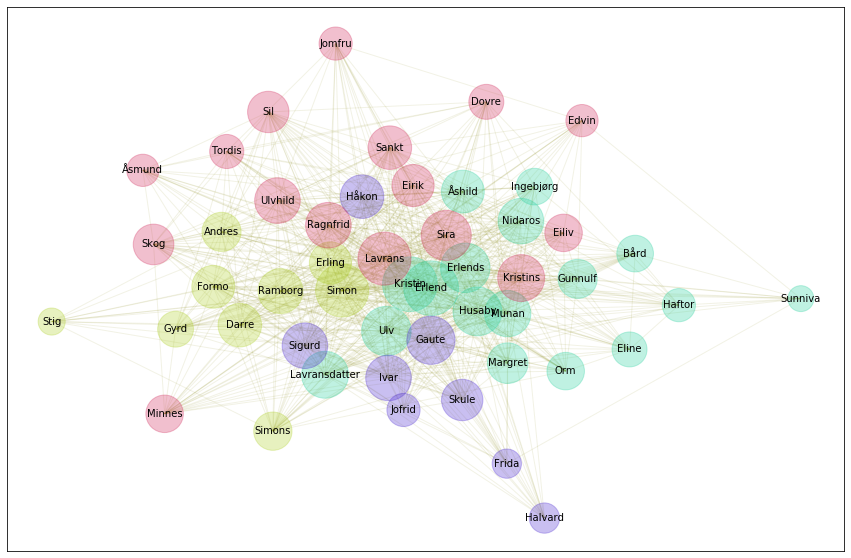

In [183]:
gnl.show_graph(G)

In [229]:
nb.urn_concordance(word ='Erling', urns = lavrans)

"Kristin Lavransdatter, Undset, Sigrid, 2009",selskap - det var herr,Erling,Vidkunssøn til Giske og Bjarkøy
"Kristin Lavransdatter, Undset, Sigrid, 2009",kjente disse . Men herr,Erling,forklarte at de hadde truffet
"Kristin Lavransdatter, Undset, Sigrid, 2009","tale om Erlend , og",Erling,", som hadde ærend i"
"Kristin Lavransdatter, Undset, Sigrid, 2009",Herr,Erling,så noe brydd ut .
"Kristin Lavransdatter, Undset, Sigrid, 2009",Imens satt herr,Erling,og Erlend oppe i ridderloftet


In [184]:
gnl.show_communities(G)

Simon-Ramborg :  Simon, Ramborg, Darre, Formo, Erling, Andres, Simons, Gyrd, Stig

Kristin-Erlend :  Kristin, Erlend, Erlends, Ulv, Husaby, Lavransdatter, Munan, Nidaros, Åshild, Margret, Gunnulf, Orm, Bård, Ingebjørg, Eline, Haftor, Sunniva

Gaute-Sigurd :  Gaute, Sigurd, Ivar, Håkon, Skule, Jofrid, Halvard, Frida

Lavrans-Sira :  Lavrans, Sira, Kristins, Ragnfrid, Ulvhild, Sankt, Eirik, Sil, Skog, Minnes, Eiliv, Dovre, Tordis, Jomfru, Åsmund, Edvin



In [212]:
gnl.community_dict(G)

{'Simon-Ramborg': ['Simon',
  'Ramborg',
  'Darre',
  'Formo',
  'Erling',
  'Andres',
  'Simons',
  'Gyrd',
  'Stig'],
 'Kristin-Erlend': ['Kristin',
  'Erlend',
  'Erlends',
  'Ulv',
  'Husaby',
  'Lavransdatter',
  'Munan',
  'Nidaros',
  'Åshild',
  'Margret',
  'Gunnulf',
  'Orm',
  'Bård',
  'Ingebjørg',
  'Eline',
  'Haftor',
  'Sunniva'],
 'Gaute-Sigurd': ['Gaute',
  'Sigurd',
  'Ivar',
  'Håkon',
  'Skule',
  'Jofrid',
  'Halvard',
  'Frida'],
 'Lavrans-Sira': ['Lavrans',
  'Sira',
  'Kristins',
  'Ragnfrid',
  'Ulvhild',
  'Sankt',
  'Eirik',
  'Sil',
  'Skog',
  'Minnes',
  'Eiliv',
  'Dovre',
  'Tordis',
  'Jomfru',
  'Åsmund',
  'Edvin']}

In [232]:
cd = gnl.community_dict(G)

In [236]:
df = nb.plot_book_wordbags(lavrans[0], gnl.community_dict(G))

In [235]:
[cd[x][:2] for x in cd]

[['Simon', 'Ramborg'],
 ['Kristin', 'Erlend'],
 ['Gaute', 'Sigurd'],
 ['Lavrans', 'Sira']]

In [242]:
df2 = nb.plot_book_wordbags(lavrans[0], [[x[0]] for x in nb.central_betweenness_characters(G, 5)])

In [225]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4532, 4533, 4534, 4535, 4536, 4537, 4538, 4539, 4540, 4541],
           dtype='int64', length=18168)

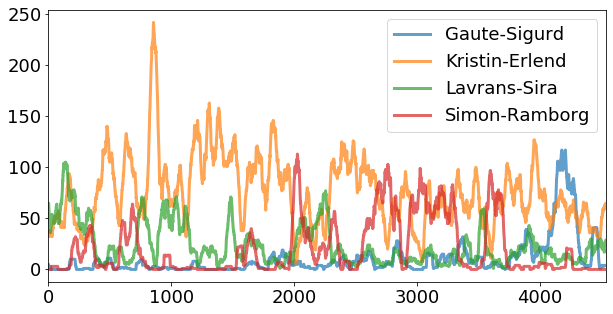

In [238]:
df.plot(lw=3, alpha = .7, figsize=(10,5))

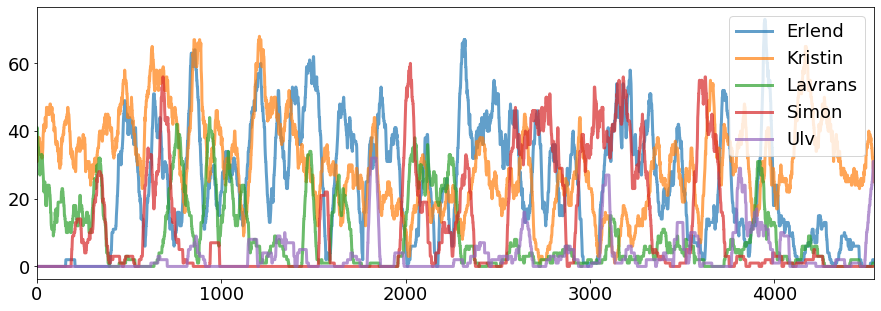

In [244]:
df2.plot(lw=3, alpha = .7, figsize=(15,5))

In [ ]:
lavrans

In [187]:
erlend = littcoll('Erlend', urns=lavrans, before=0, after = 3, compare = tot.tot, freqlim = 3)

In [191]:
simon = littcoll('Simon', urns=lavrans, before=0, after = 3, compare = tot.tot, freqlim = 3)

In [196]:
simon2 = littcoll('Simon', urns=lavrans, before=0, after = 3, compare = korpus_agg[0], freqlim = 3)

In [197]:
simon_bok = pprint(simon2)

## Benevnelser 
<span style='font-size:150%'>Andressøn, Darre, Reidarssøn, Darres, Formo, Ramborg, Erlend, Simon, Kristin, !, «, -</span>

## adj
<span style='font-size:150%'>leende, ridende, hjertelig, hardt, heftig, god, svært</span>
## unknown
<span style='font-size:150%'>taug, såtte</span>
## subst
<span style='font-size:150%'>mågen, hodet, hand, datter, døren, nesten, glad</span>
## verb
<span style='font-size:150%'>brast, kort, hilste, lo, hentet, slapp, husket, løftet, slo, sprang, talt, smilte, ropte, kjente, rystet, reiste, sakte, skjønte, red, fortalte, satt, tenkte, bød, bad, fort, spurte, likte, kastet, mente, fulgte, tok, sett, sagt, seg, opp, ville, tale, gav, drog, snakket, følge, litt, sitt, nei, svarte, ble, sa, visste, rent, måtte, syntes, tatt, ett, stod, gikk, dette, kunne, rett, før, holde, hadde, kom, lå, blitt</span>
## adv
<span style='font-size:150%'>neppe, straks, igjen, ganske, alltid, hvordan</span>
## prep
<span style='font-size:150%'>nedover, ned</span>


In [192]:
simon_tot = pprint(simon)

## Benevnelser 
<span style='font-size:150%'>Darre, Ramborg, Formo, Erlend, Kristin, Simon, Nu, «</span>

## subst
<span style='font-size:150%'>mågen, datter, glad, hand, hodet, døren, nu, nesten</span>
## unknown
<span style='font-size:150%'>taug, såtte</span>
## adj
<span style='font-size:150%'>leende, ridende, hjertelig, heftig, hardt, svært, god</span>
## verb
<span style='font-size:150%'>brast, rystet, bød, husket, hilste, sakte, lo, red, skjønte, bad, sprang, talt, løftet, hentet, drog, kjente, slapp, syntes, smilte, stod, reiste, likte, slo, tenkte, satt, ropte, rent, gav, kort, spurte, tok, kastet, visste, nei, fortalte, snakket, litt, fulgte, sagt, sitt, fort, mente, tale, lå, svarte, hadde, måtte, følge, gikk, sett, sa, kom, blitt, holdt, hatt, holde, ville, så, seiv, opp, før, gjorde, seg, fikk</span>
## adv
<span style='font-size:150%'>neppe, straks, enda, alltid, igjen, aldri, ganske</span>
## prep
<span style='font-size:150%'>nedover, henne, ned, bort</span>


In [230]:
erlend2 = littcoll('Erlend', urns=lavrans, before=0, after = 3, compare = korpus_agg[0], freqlim = 3)

In [231]:
erlend_bok = pprint(erlend2)

## Benevnelser 
<span style='font-size:150%'>Nikulaussøns, Nikulaussøn, Nikulaussøn,, Eldjarn, Husaby, Ett, Margret, Kristins, Ulv, 10., Kristin, Nåkkve, Simon, Erlend</span>

## adj
<span style='font-size:150%'>leende, hånlig, heftig, smilende, alvorlig, lavt, rolig, høyt</span>
## verb
<span style='font-size:150%'>gjestet, skjemte, leide, nevnt, dempet, lo, bøyde, seilte, knuget, bet, handlet, ri, bry, løftet, slapp, sakte, lokket, eide, råde, kort, slo, red, satt, båret, smilte, lengtet, mente, drog, rystet, reist, fort, fare, glemt, latt, sendte, hvisket, møtte, opp, merket, kastet, rørte, litt, skrek, bød, skjønner, fira, føre, løp, sak, holdt, likte, sa, ble, gitt, ropte, seg, lot, gått, skulle, måtte, meget</span>
## subst
<span style='font-size:150%'>hallen, skuldrene, nord, hodet, datteren, hand, hesten, eldste, konen, hest, hustru, alene, hånden, hendene</span>
## adv
<span style='font-size:150%'>atter, dog</span>
## prep
<span style='font-size:150%'>inn</span>


In [188]:
erlend_tot = pprint(erlend)

## Benevnelser 
<span style='font-size:150%'>Husaby, Kristins, Margret, Erlend, Lavrans, Kristin, Ulv, Simon, Ett, Nu, 10.</span>

## verb
<span style='font-size:150%'>skjemte, gjestet, knuget, sakte, leide, råde, rystet, lo, bød, red, lengtet, dempet, fira, drog, seilte, båret, lokket, løftet, eide, bøyde, handlet, bry, skjønne, rørte, latt, slapp, satt, skjønner, smilte, hvisket, skrek, reist, skjønte, kunnet, slo, mente, glemt, elsket, litt, fare, ri, likte, merket, sendte, løp, møtte, meget, lot, kastet, fort, hadde, holdt, kort, nevnt, lå, oppe, sitt, redd, reiste</span>
## adj
<span style='font-size:150%'>leende, heftig, hånlig, smilende, alvorlig, lavt, rolig</span>
## subst
<span style='font-size:150%'>konen, hallen, hustru, datteren, hesten, nu, skuldrene, hand, gutten, hest, hjem, eldste, glad, hodet, nord, alene</span>
## adv
<span style='font-size:150%'>aldeles, allikevel, atter, enda</span>
## prep
<span style='font-size:150%'>efter, henne, bort</span>


In [155]:
han2_grp = pprint(han_lav2)

## Benevnelser 
<span style='font-size:150%'>10., Bjørgvin, Sil</span>

## adj
<span style='font-size:150%'>barnløs, drukken, blodrød, føyelig, bønnlig, djerv, alvorlig, endelig, fortvilet, brått, from, fattig, blidt, fullt, ferdig</span>
## verb
<span style='font-size:150%'>ektet, dugde, brølte, frisknet, angret, gadd, forvirret, burde, brukte, brydd, følt, feste, fått, brukt, giftet, brakt, funnet, forstod, fornøyd, føres, brutt, førte, gitt, ført, akter, forferdet, gjort, fatt, bedt, gift, fristet, forsøkte, gjemt, gjemte, budt, begynt, bøte, hadde, ha, avlet, drømt, eide, fant, føre, finne, fort, gjorde, evnet, elsket, greie, glemte, gjøre, ekte, blitt, festet, grep, bar, bruke, få, bare, friste, døde, bo, drakk, aktet, arbeidet, gi, fikk</span>
## unknown
<span style='font-size:150%'>duget</span>
## subst
<span style='font-size:150%'>boken, farvel, fingrene, bruden</span>
## adv
<span style='font-size:150%'>dog, alltid, aldri, aldeles, først, allikevel</span>
## prep
<span style='font-size:150%'>fremfor, bort, forbi</span>


In [156]:
hun2_grp = pprint(hun_lav2)

## Benevnelser 
<span style='font-size:150%'>Gullsveinen, KRANSEN, Frida</span>

## verb
<span style='font-size:150%'>hakket, dånet, droges, gruet, forstod, gripe, følte, følt, forbauset, frøs, giftes, drømt, fødte, forskrekket, evnet, ante, gråt, fattet, burde, dø, føle, beholde, gadd, ferdedes, forferdet, hatt, grått, fått, elsket, eide, funnet, dra, fatt, glemt, giftet, begynt, aktet, bøte, gråte, hadde, blitt, glimt, fulgt, gitt, finne, fristet, fikk, født, ha, forundret, bære, gift, angret, flytte, båret, frisk, brukte, gjort, gått, brakte, gi, bet, falle, harm, helt, få, bli, bie, bar, gå, bare, be</span>
## unknown
<span style='font-size:150%'>fullelig</span>
## adj
<span style='font-size:150%'>engstelig, hastig, bittert, blyg, ergerlig, endelig, gråtende, ferdig, heftig</span>
## adv
<span style='font-size:150%'>atter, aldri, allerede, gjerne, alltid</span>
## subst
<span style='font-size:150%'>begeret, gråten, enke, fa, blikk, døden</span>
## prep
<span style='font-size:150%'>hen, forbi, bakom</span>
## det
<span style='font-size:150%'>all</span>


In [157]:
hun_grp = pprint(hun_lav)

## Benevnelser 
<span style='font-size:150%'>Erlends, Jofrid, Husaby, Erlend, UNDSET, SIGRID, Kristins, Munan, Lavrans, Gunnulf, Gaute, Margret, Sira, Kristin, Ulv, Orm, Edvin, Frida, Simon, Skule, Ingebjørg</span>

## verb
<span style='font-size:150%'>evnet, droges, giftes, ferdedes, gadd, gruet, bøte, frøs, fristet, gråt, fira, fødte, harm, bød, drømt, båret, aktet, friste, eide, følt, forferdet, broder, elsket, angret, fattet, bære, berget, bie, hakket, følte, forskrekket, fatt, grått, blek, forundret, bad, forstod, hadde, glemt, bar, glimt, brakte, gråte, dø, hilse, hatt, giftet, frisk, fått, gift, forbauset, ante</span>
## subst
<span style='font-size:150%'>frender, begeret, gråten, enke, benken, frue, datteren, barnet, fa, gutten, ansikt</span>
## adj
<span style='font-size:150%'>blyg, heftig, gråtende, hastig, bittert, ergerlig, engstelig, forferdelig</span>
## prep
<span style='font-size:150%'>bakom</span>
## adv
<span style='font-size:150%'>aldeles, enda, aldri, allikevel, atter</span>
## det
<span style='font-size:150%'>hin</span>
## unknown
<span style='font-size:150%'>fars</span>


In [158]:
han_grp = pprint(han_lav)

## Benevnelser 
<span style='font-size:150%'>Ramborg, Gyrd, Kristins, Lavrans, SIGRID, Munan, UNDSET, Ragnfrid, Erlends, Erlend, Lavransdatter, Kristin, Margret, Sira, Gaute, Bjørgvin, Orm, Sil, Andres, Nidaros, Simon, Erling, Enda</span>

## adj
<span style='font-size:150%'>bønnlig, drukken, barnløs, blodrød, føyelig, djerv, blidt, fortvilet, fattig, brått</span>
## verb
<span style='font-size:150%'>frisknet, evnet, gadd, fira, dugde, budt, avlet, bøte, angret, friste, fristet, ektet, bød, brydd, gjemte, erter, båret, eide, aktet, forferdet, brakt, akter, drog, drømt, bad, brutt, fatt, elsket, følt, blek, bedt, brølte, bar, drakk, giftet, brant, fått, hadde, fare, gift, gjemt, forvirret, feste, gråt, gav, ført, festet, førte, bøyde, bære, glemte</span>
## subst
<span style='font-size:150%'>frende, bruden, benken, datteren, farvel, fingrene, broren, armene</span>
## adv
<span style='font-size:150%'>aldeles, allikevel, aldri, alltid, dog, enda</span>
## prep
<span style='font-size:150%'>efter, bort</span>


In [159]:
han_lav2.loc[han2_grp['verb']].head(50)

,0
ektet,0.024403
dugde,0.021962
brølte,0.021962
frisknet,0.021962
angret,0.011713
gadd,0.010295
forvirret,0.009761
burde,0.009633
brukte,0.009412
brydd,0.009151


In [275]:
erlend_dist = co.dist_coll_urn('Erlend', urns = lavrans, before = 0, after = 20)
nb.frame_sort(erlend_dist[erlend_dist['score'] <= 8],'score', ascending=True)

,freq,dist,score
Nikulaussøns,17.0,1.00,1.56
Nikulaussøn,100.0,1.72,1.81
Eldjarn,6.0,1.00,2.58
"Nikulaussøn,",3.0,1.00,4.17
Gautessøn,2.0,1.00,5.75
brakt,7.0,5.00,5.79
Ett,5.0,4.80,5.94
brud,4.0,4.75,6.19
10.,7.0,5.57,6.27
Bjørgvin,4.0,5.25,6.56


In [305]:
categorize??

In [306]:
nb.frame_sort(erlend_dist.fillna(0), 'reldist').head(20).index

Index(['Nikulaussøns', 'Nikulaussøn', 'Eldjarn', 'Nikulaussøn,', 'Gautessøn',
       'brakt', 'Ett', 'brud', '10.', 'Bjørgvin', 'bet', 'Gyrd', 'alvorlig',
       'Haugen', 'beveget', 'ante', 'abbeden', 'Birgsi', 'Visst', 'Bård'],
      dtype='object')

In [276]:
erlend_dist['reldist'] = 20/erlend_dist.score

In [277]:
erlend_dist['relfreq'] = erlend_dist['freq']/tot.tot

In [310]:
nb.frame_sort(erlend_dist, 'reldist').head(50)

,freq,dist,score,reldist,relfreq
Nikulaussøns,17.0,1.00,1.56,12.820513,NaN
Nikulaussøn,100.0,1.72,1.81,11.049724,NaN
Eldjarn,6.0,1.00,2.58,7.751938,NaN
"Nikulaussøn,",3.0,1.00,4.17,4.796163,NaN
Gautessøn,2.0,1.00,5.75,3.478261,NaN
brakt,7.0,5.00,5.79,3.454231,2.105181e-05
Ett,5.0,4.80,5.94,3.367003,1.318193e-05
brud,4.0,4.75,6.19,3.231018,3.411805e-05
10.,7.0,5.57,6.27,3.189793,3.488533e-06
Bjørgvin,4.0,5.25,6.56,3.048780,1.185747e-04


In [309]:
esc = pprint(erlend_dist.fillna(0), 'reldist')

## Benevnelser 
<span style='font-size:150%'>Nikulaussøns, Nikulaussøn, Eldjarn, Nikulaussøn,, Gautessøn, Ett, 10., Bjørgvin, Gyrd, Haugen, Birgsi, Visst, Bård, Minnes, Geirmund, Ulvs, Gunnulf-, Fra, Sundbumennene, Hørte, Haftorssønnene, Faren, Ved, Erlendssøn, Sil, At, Mannen, Nikuiaussøn, Tenk, Hålogaland, :, Hadde, Har, Sønnene, Min, Hver, Husaby, Kom, Borgar, Seiv, Guds, Kristins, Hold, Sønn, 111, Filippusdatter, !, Nikulaus, Noen, Bårdssøn, Om, Ivar, Pål, Imens, Haldorssøn, Slikt</span>

## verb
<span style='font-size:150%'>brakt, bet, beveget, ante, bedre, bedt, arm, bie, brukte, ane, avlet, bryn, blek, benet, bodde, bak, blusset, bry, bord, barsk, berger, bråstanset, arver, brakte</span>
## subst
<span style='font-size:150%'>brud, abbeden, brynene, albuen, alene, broren, bakken</span>
## adj
<span style='font-size:150%'>alvorlig, bent, brått, brennende, besynderlig</span>
## adv
<span style='font-size:150%'>allerede, aldeles, allikevel, aller</span>
## prep
<span style='font-size:150%'>bortover, bort, bakover</span>
## unknown
<span style='font-size:150%'>bergning</span>


In [291]:
esc = pprint(erlend_dist, 'relfreq')

## Benevnelser 
<span style='font-size:150%'>Husaby, Gunnulf, Munan, Lavrans, Erlends, Erlend, UNDSET, Ramborg, Kristins, Haftor, SIGRID, Minnes, Margret, Kristin, Gyrd, Jofrid, Lavransdatter, Darre, Ragnfrid, Ulv, Sira, Gunnulv, Kristkirken, Nonneseter, Borgar, Gaute, Formo, Hestnes, FRUKT, Orm, Elgeseter, Klemens, Sunniva, Eiliv, Simon, Geirmund, Misnøyen, Kalundborg, Eiendommene, Drivdalen, Fete, Hater, Eline, Sønnene, Trøndelagen, Godøy, Efterpå, Gråter, Våger, Frues, Harmen, Ulvhild, Bjørgvin, Nettene, Veøy, Følget, Trondheimen, Nordover, Simons, Jonssøn, Gauldalen, Ingemund, Skule, Ivars, Nidaros, Granheim, Katrin, Uken, Skara, Gjesten</span>

## verb
<span style='font-size:150%'>berges, bares, anget, berger, beile, aget, bråstanset, blunder</span>
## subst
<span style='font-size:150%'>bisselet, arbeidsfolket, aftensang, bjerken, baroner, abbeden, bissel, abbed, amor, brannene</span>
## adj
<span style='font-size:150%'>barnaktig, blodfattig, blånende, bevende, bitrere, avholdte, beske, beskt, brustne</span>
## unknown
<span style='font-size:150%'>brødres, blågrønn, bråsnudde</span>
